# Setup

### Setup mnist dataset

In [59]:
from keras.datasets import mnist
from keras.utils import np_utils

# Load larning data
(trainX, trainy), (testX, testy) = mnist.load_data()
trainX, testX = [x.reshape(x.shape[0], x.shape[1] * x.shape[2]) for x in [trainX, testX]]
trainY, testY = [np_utils.to_categorical(y, 10) for y in [trainy, testy]]

### Prepare helper function

In [60]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.subplot(221)
    plt.plot(np.arange(nb_epoch), history.history["loss"], color="r", label="loss")
    plt.subplot(222)
    plt.plot(np.arange(nb_epoch), history.history["val_loss"], color="b", label="val_loss")
    plt.subplot(223)
    plt.plot(np.arange(nb_epoch), history.history["acc"], color="g", label="acc")
    plt.subplot(224)
    plt.plot(np.arange(nb_epoch), history.history["val_acc"], color="y", label="val_acc")

In [61]:
from sklearn.metrics import classification_report

def evaluate_model(model, testX, testY):
    Yhat = model.predict(testX)
    yhat = np.argmax(Yhat, axis=1)
    print(classification_report(testy, yhat))

# Compare optimizer behavior

### Experiment situation
- Problem : mnist classification (without input scaling)
- model : 1 hidden-layer feed-forward network

### SGD
- trapped in Plateau around 5 epoch 70 epoch

             precision    recall  f1-score   support

          0       0.94      0.99      0.97       980
          1       0.91      0.99      0.95      1135
          2       0.96      0.87      0.91      1032
          3       0.57      0.97      0.72      1010
          4       0.73      0.94      0.82       982
          5       0.79      0.91      0.84       892
          6       0.91      0.95      0.93       958
          7       0.56      0.98      0.71      1028
          8       0.00      0.00      0.00       974
          9       0.00      0.00      0.00      1009

avg / total       0.64      0.76      0.69     10000



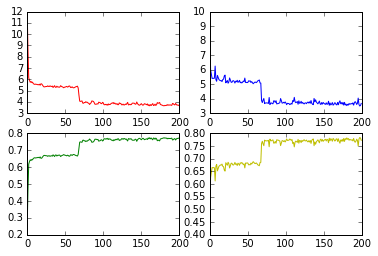

In [41]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# Define model architecture
model = Sequential()
model.add(Dense(100, input_shape=(784,)))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Start training
nb_epoch = 20
history = model.fit(trainX, trainY, batch_size=128, nb_epoch=nb_epoch, verbose=0, validation_split=0.1)
plot_training_history(history)
evaluate_model(model, testX, testY)

### AdaGrad
- trapped in Plateau around 5 epoch but escaped around 20 epoch

             precision    recall  f1-score   support

          0       0.81      0.99      0.89       980
          1       0.92      0.99      0.95      1135
          2       0.00      0.00      0.00      1032
          3       0.38      0.98      0.55      1010
          4       0.46      0.99      0.63       982
          5       0.00      0.00      0.00       892
          6       0.85      0.97      0.91       958
          7       0.00      0.00      0.00      1028
          8       0.52      0.95      0.67       974
          9       0.00      0.00      0.00      1009

avg / total       0.40      0.59      0.46     10000



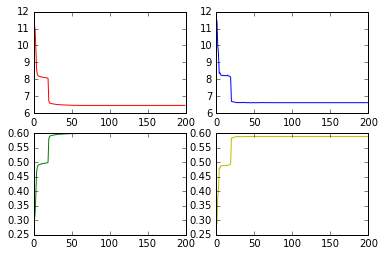

In [47]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# Define model architecture
model = Sequential()
model.add(Dense(100, input_shape=(784,)))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adagrad", metrics=["accuracy"])

# Start training
nb_epoch = 200
history = model.fit(trainX, trainY, batch_size=128, nb_epoch=nb_epoch, verbose=0, validation_split=0.1)
plot_training_history(history)
evaluate_model(model, testX, testY)